### Import the appropriate modules 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

### Load in the Data as a Pandas Data Frame

In [3]:
BT = pd.read_csv('Batting.csv')

### What are the dimensions of the data?

In [4]:
BT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameLast     102816 non-null object
nameFirst    102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [5]:
BT.head(5)

,playerID,nameLast,nameFirst,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


### Add a column to the data frame that combines nameLast and nameFirst, entitle this playerName.  
### You will be using this column extensively

In [4]:
BT['playerName'] = BT['nameFirst'] + ' ' + BT['nameLast']

In [10]:
BT['playerName'].head()

0    Abercrombie Frank
1             Addy Bob
2          Allison Art
3         Allison Doug
4            Anson Cap
Name: playerName, dtype: object

### How many players appeared in 1880?  Required: Count of players

In [12]:
BT[BT['yearID'] == 1880]['playerID'].count()

135

### Which five years had the most players appear? Required: Year and count of players

In [14]:
BT['yearID'].value_counts().head(5)

2015    1486
2016    1483
2014    1435
2013    1409
2012    1408
Name: yearID, dtype: int64

### How many players had over 500 or more ABs?  Required: Count of players

In [19]:
(BT.groupby('playerID')['AB'].sum() > 500).sum()

5145

### Which player had the most HRs in 1909?  Required: Player and HR total

In [28]:
BT[BT['yearID'] == 1909].groupby('playerName')['HR'].sum().reset_index().sort_values('HR', ascending=False).head(1)

,playerName,HR
84,Cobb Ty,9


### How many players have had more than 200 hits, 20 2Bs, 5 3Bs, and 20 HRs in a season? 
### Required: Player, H, 2B, 3B, HR

In [26]:
BT200H = BT.groupby(['yearID','playerName']).sum().reset_index()[['playerName','H','2B','3B','HR']]

In [35]:
BT200H[(BT200H['H'] > 200) & (BT200H['2B'] > 20) & (BT200H['3B'] > 5) & (BT200H['HR'] > 20)]['playerName'].nunique()

56

In [37]:
BT200H[(BT200H['H'] > 200) & (BT200H['2B'] > 20) & (BT200H['3B'] > 5) & (BT200H['HR'] > 20)]['playerName'].value_counts()

### Who had the highest batting average in 2009?  Required: Player, Average, and HRs for that player.  
### Hint:  Batting Average is H/AB

In [5]:
BTavg = BT.groupby(['yearID','playerName']).sum().reset_index()

In [6]:
BTavg['Bavg'] = BTavg['H'] / BTavg['AB']

In [7]:
BTavg[BTavg['yearID'] == 2009].sort_values('Bavg',ascending=False).head(10)[['playerName','Bavg','HR']].head(1)

,playerName,Bavg,HR
84908,Davidson Dave,1.0,0


### What was the average amount of HRs for all players in 1975 who had 200 or more ABs?

In [18]:
BT[(BT['yearID'] == 1975) & (BT['AB'] >= 200)]['HR'].mean()

9.472440944881889

### Same question as above but for players in 1987 with 400 or more ABs?

In [19]:
BT[(BT['yearID'] == 1987) & (BT['AB'] >= 400)]['HR'].mean()

19.006410256410255

### In 1984, who had the top 5 highest batting averages?

In [23]:
BTavg[(BTavg['yearID'] == 1984)].sort_values('Bavg',ascending=False)[['playerName','Bavg']].head(5)

,playerName,Bavg
57685,Von Ohlen Dave,1.000000
57081,Forster Terry,0.666667
57600,Smith Zane,0.555556
57268,Laga Mike,0.545455
57019,Dayley Ken,0.500000


### In 1963, who had the 5 lowest batting averages for players with 400 or more ABs?

In [24]:
BTavg[(BTavg['yearID'] == 1963)& (BTavg['AB'] >= 400)].sort_values('Bavg',ascending=True)[['playerName','Bavg']].head(5)

,playerName,Bavg
39903,Lillis Bob,0.198294
39778,Goss Howie,0.209246
39577,Bateman John,0.210396
39563,Aspromonte Bob,0.213675
40212,Wine Bobby,0.215311


### Which years had the most 2Bs?  Top 5

In [28]:
BT.groupby('yearID').sum().reset_index().sort_values('2B',ascending=False)[['yearID','2B']].head(5)

,yearID,2B
136,2007,9197
135,2006,9135
137,2008,9014
133,2004,8919
129,2000,8901


### Who has the most 3Bs for their career?

In [30]:
BT.groupby('playerName').sum().reset_index().sort_values('3B',ascending=False)[['playerName','3B']].head(1)

,playerName,3B
3528,Crawford Sam,309


### Who had the most HRs in their 20s (Aged 29 or less)?

In [32]:
(BT['yearID'] - BT['birthYear']).head(10)

0      21
1      29
2      22
3      25
4      19
5      21
6      32
7      21
8    1871
9      27
dtype: int64

In [33]:
BT[((BT['yearID'] - BT['birthYear']) < 30) & (BT['birthYear'] > 0)].groupby('playerName').sum().reset_index().sort_values('HR',ascending=False)[['playerName','HR']].head(5)

,playerName,HR
15647,Thomas Frank,420
6134,Griffey Ken,395
13432,Rodriguez Alex,381
12735,Pujols Albert,366
5185,Foxx Jimmie,343


### Who had the most 2Bs, 3Bs, and HRs combined in one season?

In [39]:
BT['2B+3B+HR'] = BT['2B'] + BT['3B'] + BT['HR']
BT.groupby(['yearID','playerName']).sum().reset_index().sort_values('2B+3B+HR', ascending = False)['playerName'].head(1)

17521    Ruth Babe
Name: playerName, dtype: object

### Which team has had the most players with 100 or more RBIs in a season?

In [45]:
BT[BT['RBI'] >= 100].groupby(['yearID','teamID']).count().reset_index().sort_values('playerID', ascending = False)[['teamID','yearID','playerName','RBI']].head(1)

,teamID,yearID,playerName,RBI
285,NYA,1936,5,5


### How many players have played 100 or more games from 1900 on?

In [56]:
BT100 = BT[BT['yearID'] >= 1900].groupby(['playerID']).sum().reset_index()

In [59]:
BT100[BT100['G'] > 100]['playerID'].count()

8067

### Who scored the most runs in 1938?

In [63]:
BT[BT['yearID'] == 1938].groupby(['playerName']).sum().reset_index().sort_values('R', ascending = False)['playerName'].head(1)

168    Greenberg Hank
Name: playerName, dtype: object

### In 2012 did anyone have at least 20 2Bs, 10 3Bs, 10 HRs, and 10 SBs?  If so, who were they?

In [65]:
BT[(BT['yearID'] == 2012) & (BT['2B'] >= 20) & (BT['3B'] >= 10) & (BT['HR'] >= 10) & (BT['SB'] >= 10)]['playerName']

95767     Cabrera Melky
95809    Castro Starlin
96218    Jackson Austin
96670        Reyes Jose
Name: playerName, dtype: object

### Create a column that calculates OBP (on base percentage)
### Formula: OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies + Sacrifice Hits).

In [66]:
BT['OBP'] = (BT['H'] + BT['BB'] + BT['HBP']) / (BT['AB'] + BT['BB'] + BT['HBP'] + BT['SF'] + BT['SH'])

### For all players with 500 or more ABs which players had the top 5 OBPs in 2016?

In [71]:
BTP = BT.groupby(['yearID','playerID']).sum().reset_index()

In [73]:
BTP[(BTP['AB'] > 500) & (BTP['yearID'] == 2016)].sort_values('OBP',ascending = False).head()

,yearID,playerID,birthYear,stint,G,AB,R,H,2B,3B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,2B+3B+HR,OBP
93985,2016,beltrca01,3954,3,151,552,73,163,33,0,...,0.0,35,101.0,4.0,2.0,0.0,4.0,19.0,62,0.668912
94760,2016,nunezed02,3974,3,141,553,73,159,24,4,...,10.0,29,88.0,3.0,5.0,2.0,6.0,8.0,44,0.649865
94531,2016,kempma01,3968,3,156,623,89,167,39,0,...,0.0,36,156.0,6.0,1.0,0.0,12.0,17.0,74,0.621482
94039,2016,bruceja01,3974,3,147,539,74,135,27,6,...,2.0,44,126.0,7.0,3.0,0.0,3.0,14.0,66,0.610038
95139,2016,troutmi01,1991,1,159,549,123,173,32,5,...,7.0,116,137.0,12.0,11.0,0.0,5.0,5.0,66,0.440529


In [74]:
BTP1 = BT.groupby(['playerID']).sum().reset_index()

In [77]:
fil_pla = BTP1[(BTP1['AB'] > 500)].sort_values('OBP',ascending = False)['playerID']

In [79]:
BTP[(BTP['yearID'] == 2016) & (BTP['playerID'].isin(fil_pla))].sort_values('OBP',ascending = False).head()

,yearID,playerID,birthYear,stint,G,AB,R,H,2B,3B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,2B+3B+HR,OBP
95090,2016,stubbdr01,5952,6,59,80,13,18,0,0,...,1.0,12,38.0,0.0,1.0,0.0,1.0,1.0,3,1.005820
94399,2016,guyerbr01,3972,3,101,293,39,78,17,1,...,2.0,19,55.0,1.0,31.0,1.0,1.0,6.0,27,0.782882
94643,2016,martimi02,5946,6,63,101,16,24,4,0,...,2.0,4,23.0,0.0,0.0,1.0,0.0,1.0,5,0.781746
93942,2016,arciaos01,7964,10,69,202,17,41,7,1,...,1.0,18,80.0,0.0,1.0,0.0,1.0,1.0,16,0.772898
95215,2016,wilsobo02,5949,6,75,228,25,54,6,0,...,0.0,11,64.0,0.0,1.0,7.0,4.0,6.0,13,0.732661


In [86]:
BT['playerID'].nunique() - BT['playerName'].nunique()

604

### Who had the highest OBP of all time?  Required: Player has to have had at least 500 ABs and 30 HRs.  Top 5.

In [82]:
BTP1[(BTP1['AB'] > 500) & (BTP1['HR'] > 30)].sort_values('OBP',ascending = False)[['playerID','OBP']].head()

,playerID,OBP
7383,henderi01,11.451621
1542,bondsba01,9.711481
17004,thomeji01,9.501460
618,baineha01,9.473607
14719,rosepe01,9.309313


### Bonus: I would like a barchart depicting the total amount of HRs by year

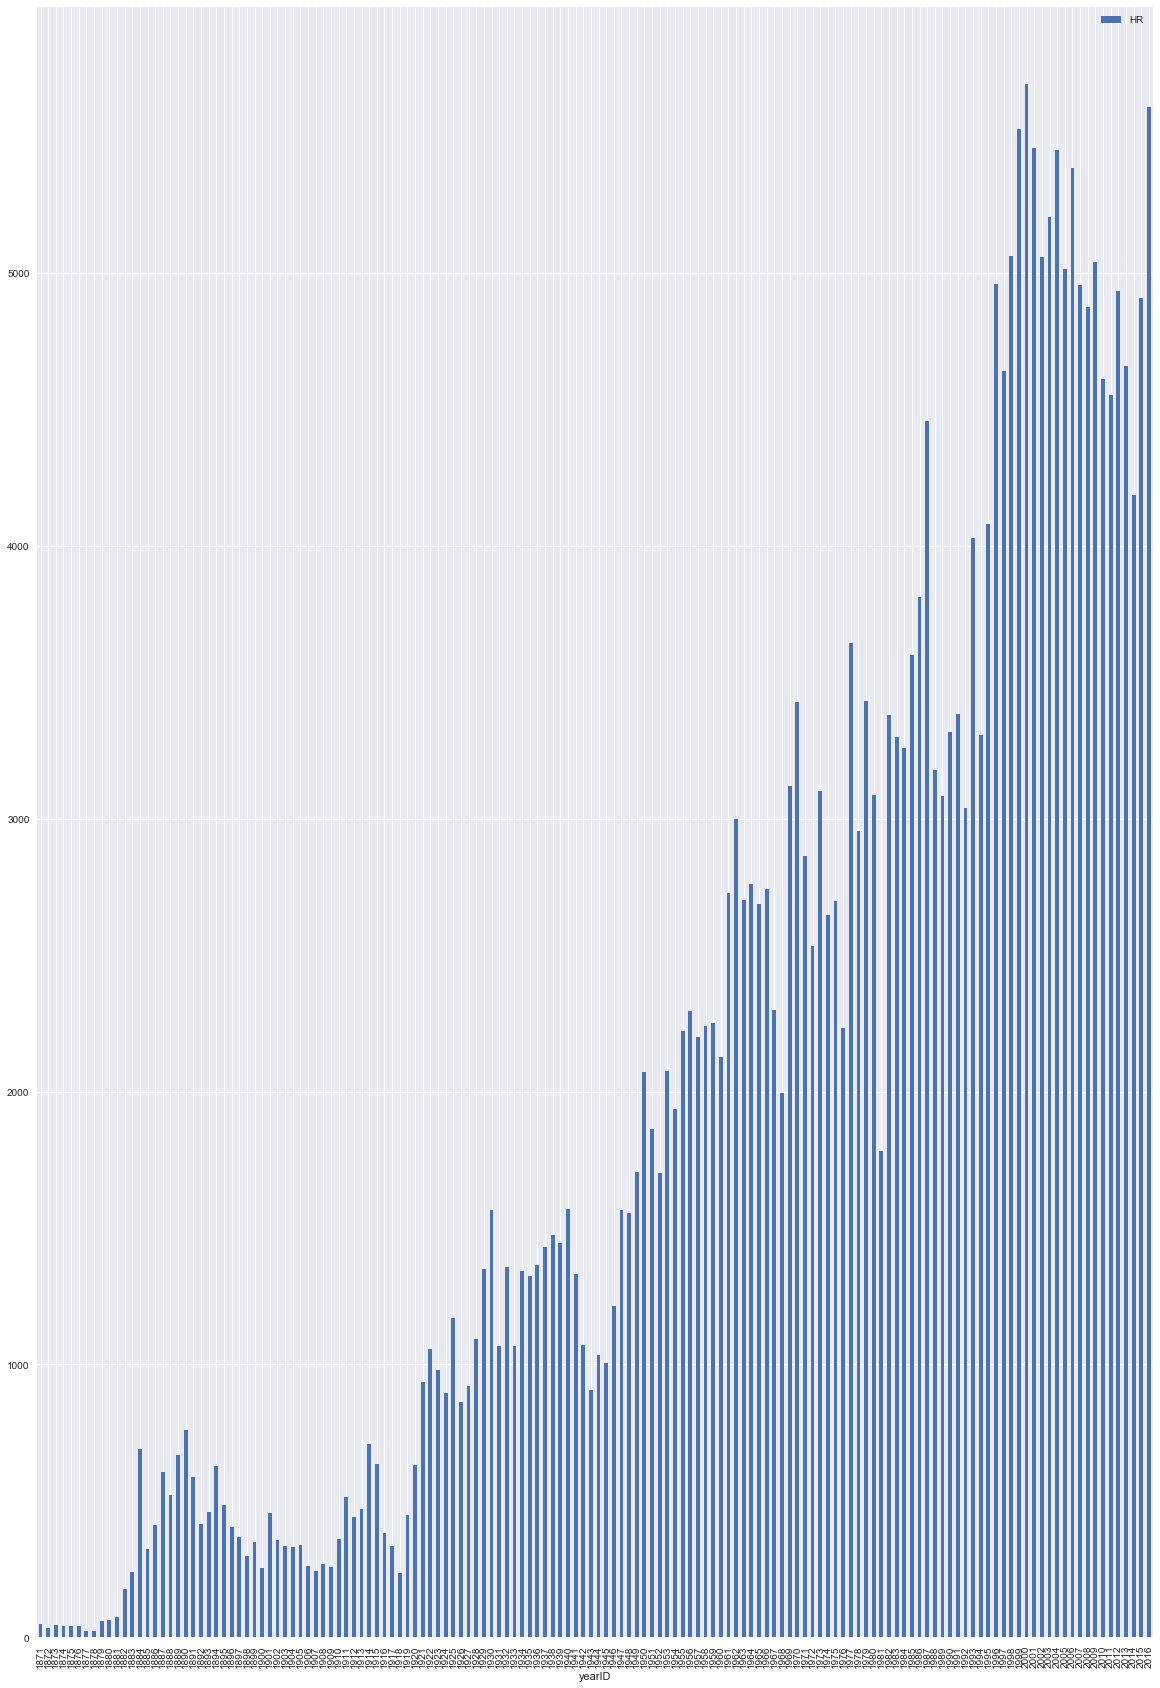

In [94]:
BT.pivot_table(values='HR',index='yearID', aggfunc=np.sum).plot.bar(figsize=(20,30),lw=2)

### Bonus #2: I would like a line graph depicting the total amount of Ks per year

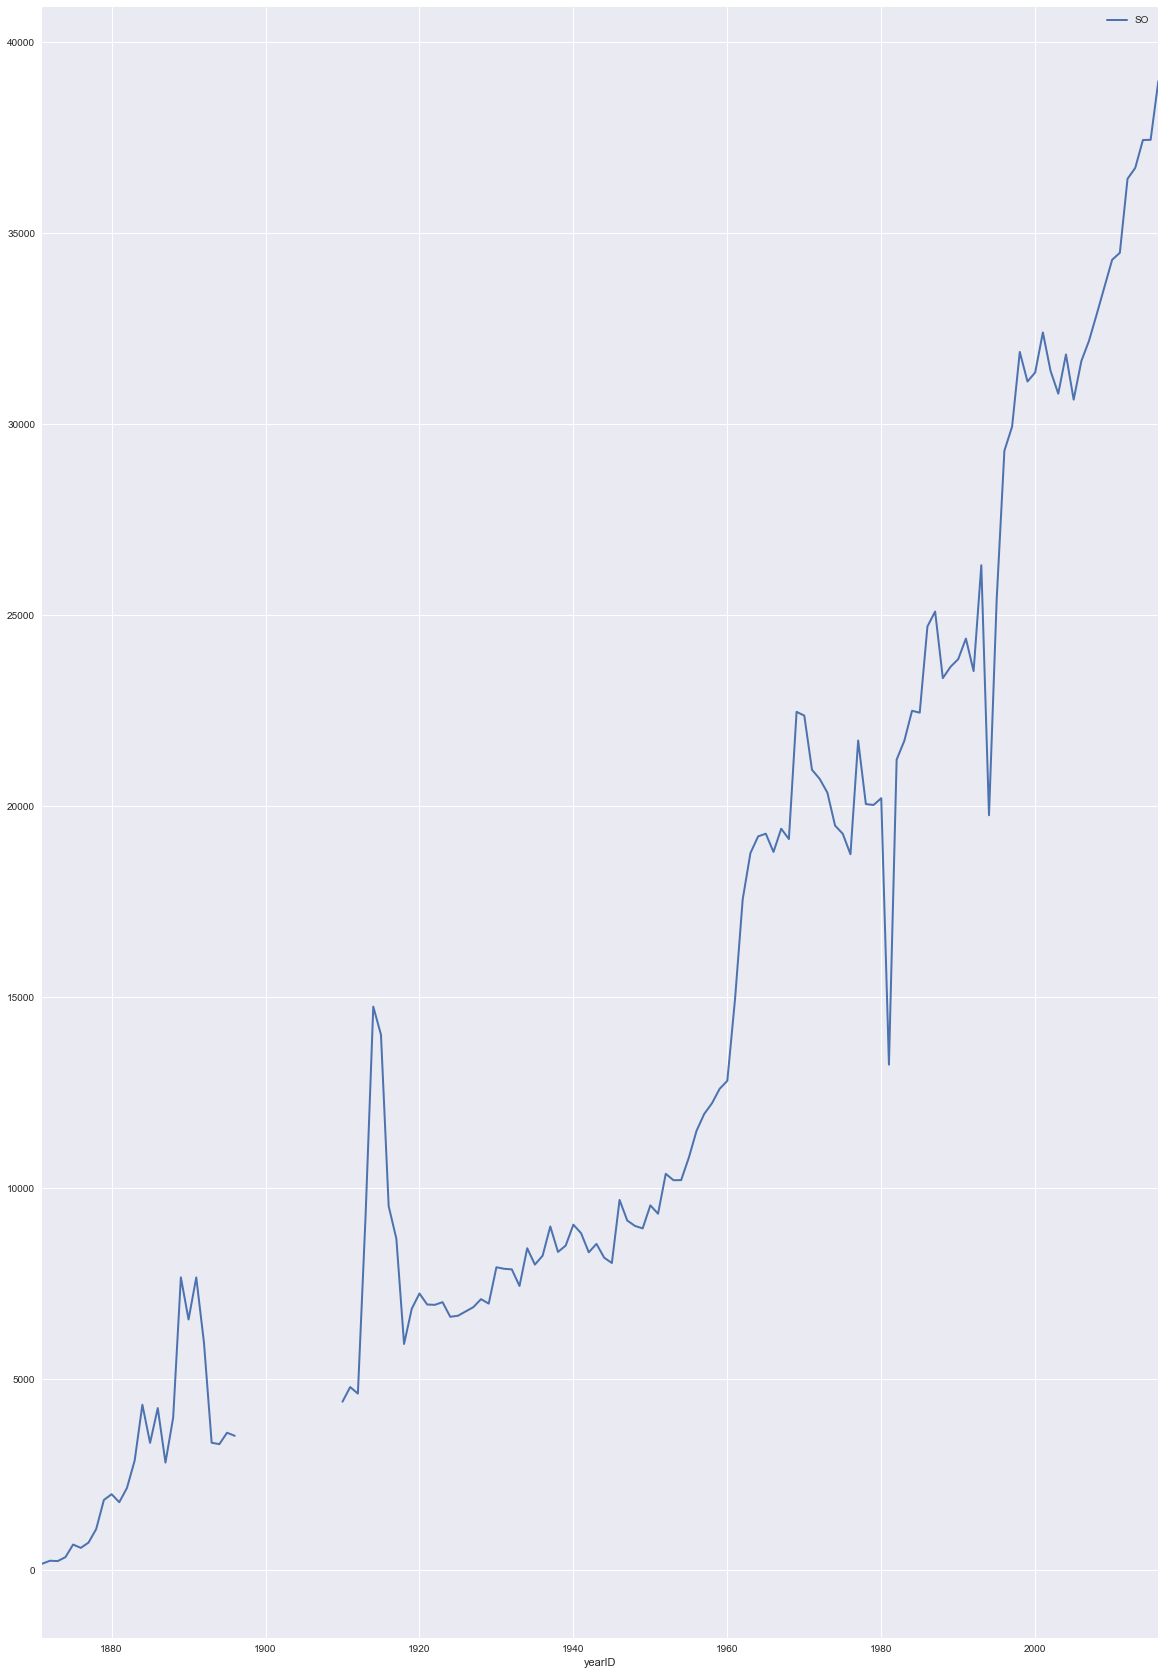

In [95]:
BT.pivot_table(values='SO',index='yearID', aggfunc=np.sum).plot.line(figsize=(20,30),lw=2)